## PJ : Faris Fadhilah / 13518026

### Import Libraries ###

In [1]:
# Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import time

### Import Dataset ###

In [2]:
# Import Dataset
data = pd.read_csv("dataset.csv")
data = data.iloc[:6000,:]
# Separate Features
X = data["Text"]
y = data["Language"]

### Label Encoding ###

In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing ##

In [4]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

### Bag of Words ###

In [5]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

### Train Test Splitting ###

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Define Model Naive Bayes (NB) & Train Model ###

In [7]:
model = MultinomialNB()
start_time = time.time()
model.fit(x_train, y_train)
print("Train Time Execution: %.3f seconds" % (time.time() - start_time))
y_pred = model.predict(x_test)

Train Time Execution: 58.205 seconds


### Evaluate Model ####

Accuracy is : 0.945


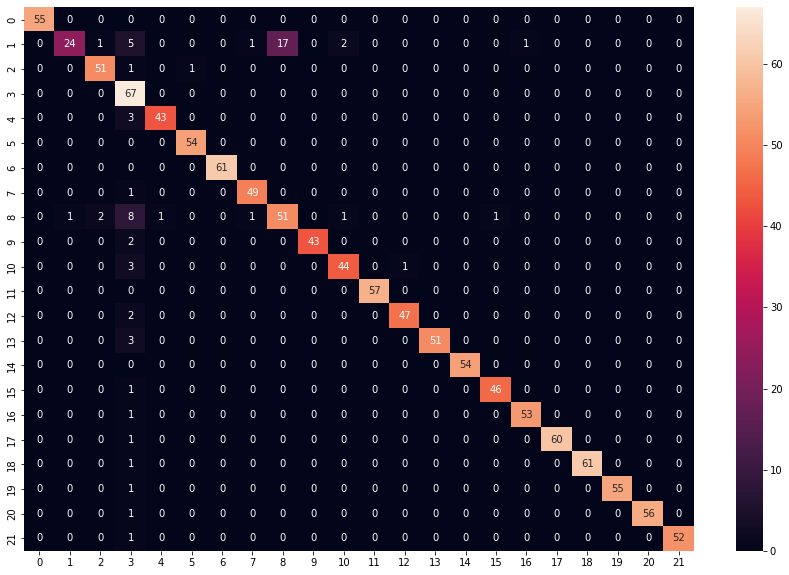

In [8]:
# show accuracy of model
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy is :",ac)
# show confusion matrix of model
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Save Model ###

In [9]:
# saving the model
filename = 'language_detection_model1.sav'
pickle.dump(model, open(filename, 'wb'))

### Function Predict Sentence ###

In [10]:
# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The language is in",lang[0])

### Load Model & Predict ###

In [11]:
start_time = time.time()
# loading the model
filename = 'language_detection_model1.sav'
model = pickle.load(open(filename, 'rb'))
# predict language
predict("We use a dataset that contains 22 selective languages from the original dataset which includes the following Languages")
print("Predict Time Execution: %.3f seconds" % (time.time() - start_time))

The language is in English
Predict Time Execution: 0.016 seconds
